In [9]:
import pandas as pd

df = pd.read_csv('clean_tweets.csv', sep=";", encoding="utf-16")
df[:2]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,tk_text,stemmed_text
0,Thu Sep 23 19:43:35 +0000 2021,1441126115905400832,1441126115905400832,"participei do @canalmynews, ontem. falei sobre...",False,"[0, 244]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1441126055155159044, 'id_str...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,False,pt,NaN,NaN,NaN,"['participei', 'canalmynews', 'ontem', 'falei'...","['particip', 'canalmynew', 'ont', 'fal', 'sobr..."
1,Thu Sep 23 19:43:30 +0000 2021,1441126094250201088,1441126094250201088,"@dicabairro complicado né,se fosse só o suprem...",False,"[12, 257]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,NaN,pt,NaN,NaN,NaN,"['dicabairro', 'complicado', 'supremo', 'votam...","['dicabairr', 'complic', 'supr', 'vot', 'bolso..."


In [10]:
from leia import SentimentIntensityAnalyzer
import ast

scores = []
for tweet in df['tk_text']:
  to_be_analyzed = ' '.join(ast.literal_eval(tweet))
  scores.append(SentimentIntensityAnalyzer().polarity_scores(to_be_analyzed))

In [11]:
df["neg"] = pd.Series([x["neg"] for x in scores])
df["pos"] = pd.Series([x["pos"] for x in scores])
df["neu"] = pd.Series([x["neu"] for x in scores])
df["compound"] = pd.Series([x["compound"] for x in scores])
df[:2]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,lang,quoted_status_id,quoted_status_id_str,quoted_status,tk_text,stemmed_text,neg,pos,neu,compound
0,Thu Sep 23 19:43:35 +0000 2021,1441126115905400832,1441126115905400832,"participei do @canalmynews, ontem. falei sobre...",False,"[0, 244]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1441126055155159044, 'id_str...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,pt,NaN,NaN,NaN,"['participei', 'canalmynews', 'ontem', 'falei'...","['particip', 'canalmynew', 'ont', 'fal', 'sobr...",0.209,0.000,0.791,-0.6486
1,Thu Sep 23 19:43:30 +0000 2021,1441126094250201088,1441126094250201088,"@dicabairro complicado né,se fosse só o suprem...",False,"[12, 257]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,pt,NaN,NaN,NaN,"['dicabairro', 'complicado', 'supremo', 'votam...","['dicabairr', 'complic', 'supr', 'vot', 'bolso...",0.064,0.092,0.843,0.1779


In [12]:
threshold = 0.05
positive = len(df[df["compound"] > threshold])
negative = len(df[df["compound"] < -threshold])
neutral = len(df) - (positive + negative)

print("Positive: ", positive, "Negative: ", negative, "Neutral:", neutral)

Positive:  924 Negative:  1038 Neutral: 906


In [13]:
def get_sentiment(compound):
  if compound > 0.05:
    return "positive"
  elif compound < -0.05:
    return "negative"
  else:
    return "neutral"

df["sentiment"] = df["compound"].apply(get_sentiment)
df.to_csv("analyzed.csv", sep=";", encoding="utf-16")

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

series_as_list = list(df["tk_text"])


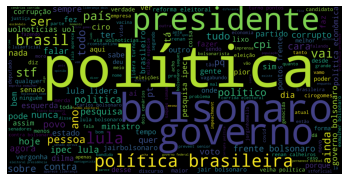

In [15]:
aggr_data = [ast.literal_eval(x) for x in series_as_list]
cloud_data = ' '.join(np.concatenate(aggr_data))
wc = WordCloud(width=3200, height=1600).generate(cloud_data)

plt.imshow(wc)
plt.axis('off')
plt.show()